<a href="https://colab.research.google.com/github/onkar201988/google_colab_tutorials/blob/main/Behavioural_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/onkar201988/Track

Cloning into 'Track'...
remote: Enumerating objects: 15010, done.
remote: Total 15010 (delta 0), reused 0 (delta 0), pack-reused 15010 (from 1)
Receiving objects: 100% (15010/15010), 217.49 MiB | 21.90 MiB/s, done.
Updating files: 100% (15007/15007), done.


In [2]:
!ls Track/

driving_log.csv  IMG


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import pandas as pd #to load data from .csv
import random
import os
import ntpath

In [4]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names= columns)
pd.set_option('display.max_colwidth', 1)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_576.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_576.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_576.jpg,0.0,0.0,0.0,0.000079
1,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_676.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_676.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_676.jpg,0.0,0.0,0.0,0.000079
2,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_782.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_782.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_782.jpg,0.0,0.0,0.0,0.000078
3,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_885.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_885.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_885.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_991.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_991.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_991.jpg,0.0,0.0,0.0,0.000078


In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path) #split the file path and only take file name as tail
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2025_06_25_15_01_40_576.jpg,left_2025_06_25_15_01_40_576.jpg,right_2025_06_25_15_01_40_576.jpg,0.0,0.0,0.0,0.000079
1,center_2025_06_25_15_01_40_676.jpg,left_2025_06_25_15_01_40_676.jpg,right_2025_06_25_15_01_40_676.jpg,0.0,0.0,0.0,0.000079
2,center_2025_06_25_15_01_40_782.jpg,left_2025_06_25_15_01_40_782.jpg,right_2025_06_25_15_01_40_782.jpg,0.0,0.0,0.0,0.000078
3,center_2025_06_25_15_01_40_885.jpg,left_2025_06_25_15_01_40_885.jpg,right_2025_06_25_15_01_40_885.jpg,0.0,0.0,0.0,0.000078
4,center_2025_06_25_15_01_40_991.jpg,left_2025_06_25_15_01_40_991.jpg,right_2025_06_25_15_01_40_991.jpg,0.0,0.0,0.0,0.000078


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


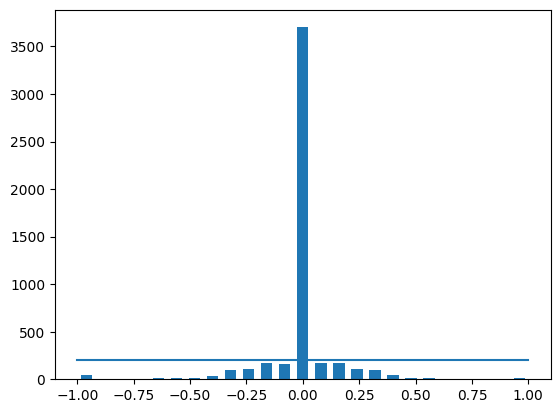

In [6]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) *0.5 # center was not at 0, and shape is 26, which does not have a center. So add shifted array and devide by 2
print(bins)
print(center)
# the histogram shows how many dataset available for each angle.
# We have more data for angle = 0. Also we have data for both left and right
# but the problem is, since we have lot of 0 angle data, out model will be biased to straigh drive, and will not turn on sharp turn
# So we will ignore 0 data, by selecting few samples
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
